[View in Colaboratory](https://colab.research.google.com/github/hackintoshrao/Deep-Learning-Training/blob/master/Linear_regression_from_scratch.ipynb)

In [2]:
import pandas as pd

data = pd.read_csv("https://goo.gl/PQXxZ8")

print(data.head())

size = data["Size"].values

price = data["Price"].values
print("total houses: ", len(price))

   Size     Price
0  2371  795000.0
1  2818  399000.0
2  3032  545000.0
3  3540  909000.0
4  1249  109900.0
('total houses: ', 779)


('total houses: ', 779)


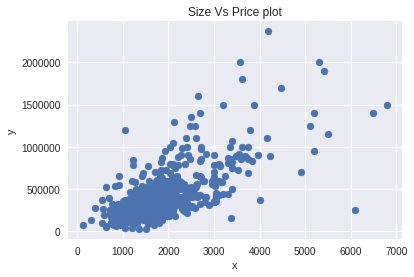

In [2]:
import pandas as pd

data = pd.read_csv("https://goo.gl/PQXxZ8")

size = data["Size"].values

price = data["Price"].values
print("total houses: ", len(price))


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

plt.scatter(size, price)
plt.title("Size Vs Price plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

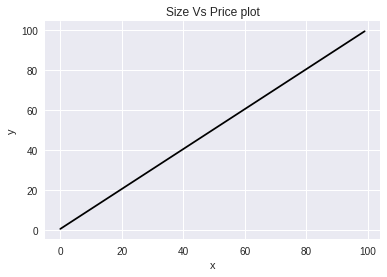

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

X = []
Y = []

a = 1
b = 0.5
for i in range(100):
  x_point = i
  y_point = a * x_point + b
  X.append(x_point)
  Y.append(y_point)

plt.plot(X, Y, color='black')
plt.title("Size Vs Price plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

('total houses: ', 779)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

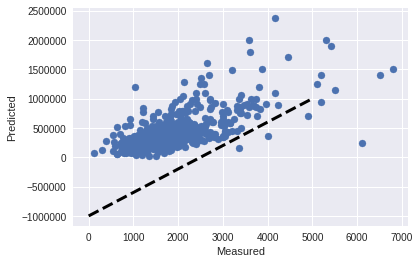

In [4]:
import pandas as pd

data = pd.read_csv("https://goo.gl/PQXxZ8")

size = data["Size"].values

price = data["Price"].values
print("total houses: ", len(price))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

X = []
Y = []

a = 400
b = -1000000
for i in range(5000):
  x_point = i
  y_point = a * x_point + b
  X.append(x_point)
  Y.append(y_point)

print(X)

 
fig, ax = plt.subplots()
ax.scatter(size, price)
ax.plot(X, Y, 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# Error or cost function



In [5]:
import pandas as pd

data = pd.read_csv("https://goo.gl/PQXxZ8")

size = data["Size"].values

price = data["Price"].values

total_houses = len(size)

a = 500
b = -10

error = 0
for i in range(total_houses):
  prediction = a * size[i] + b
  square_diff = (prediction - price[i]) ** 2
  error = error + square_diff

error = error / total_houses

print("error is : ", error)

  
  

('error is : ', 331557653084.7946)


('total houses: ', 779)
779 - number of training examples
k = 0, b = 0 | initial parameters
k = 219.65, b = -0.01 | final parameters
(219.653647341158, -0.008942201636706287)


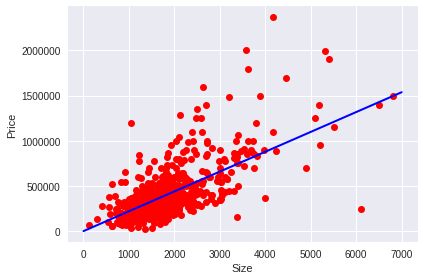

In [6]:
import pandas as pd

data = pd.read_csv("https://goo.gl/PQXxZ8")

size = data["Size"].values

price = data["Price"].values
print("total houses: ", len(price))


import numpy as np



# One step of gradient descent
def step_gradient(b_current, k_current, train_x, train_y, learning_rate):
    b_grad = 0
    k_grad = 0
    n = len(train_y)
  
    for i in range(n):
        x = train_x[i]
        y = train_y[i]
        b_grad += (1.0/n) * (((k_current * x) + b_current) - y)
        k_grad += (1.0/n) * x * (((k_current * x) + b_current) - y)
        #print(b_grad, k_grad)
        
    new_b = b_current - (learning_rate * b_grad)
    new_k = k_current - (learning_rate * k_grad)
    return [new_b, new_k]


def run_descent(train_x, train_y, init_b, init_k, num_iters, learning_rate):
    b = init_b
    k = init_k
    for i in range(num_iters):
        
        b, k = step_gradient(b, k, train_x, train_y, learning_rate)
    return [b, k]

def drawPlot(train_x, train_y, m, b):
    plt.plot(train_x, train_y, 'ro')
    print(m , b)
    plt.plot([0, 7000], [0 + b, 7000*m + b], color='b', linestyle='-', linewidth=2)
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

# Our main function for set up everything and run linear regression
def run():
    
    learning_rate = 0.0000001  # I've tried .01 - .000001  but only this worked properly

    train_x = size  # sizes of the houses
    train_y = price  # prices
    init_b = 0.1
    init_k = 0.1

    print('{} - number of training examples'.format(len(train_y)))
    print('k = 0, b = 0 | initial parameters')

    num_iters = 200
    [b, k] = run_descent(train_x, train_y, init_b, init_k, num_iters, learning_rate)

    print('k = %.2f, b = %.2f | final parameters' % (k, b))
    drawPlot(train_x, train_y, k, b)


if __name__ == '__main__':
    run()


In [7]:
def add(x, y):
  sum = x + y
  return sum 


result = add(2,4)

print(result)


6


('final_a: ', 219.6584673762679)
('final_b: ', -10.238275730072246)


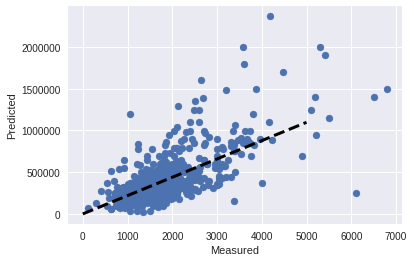

In [1]:
def make_prediction(a, b, X):
  """
  Makes prediction by using input, a and b
  """
  prediction = a * X + b
  return prediction

def cost_function(prediction, Y):
  """
  function to find the error or the cost
  """
  square_diff = (Y - prediction)**2
  return square_diff

def dJdA(prediction, Y, X, total_houses):
  """
  Function to find derivative of 
  error (J) with the parameter a.
  """
  djda = (prediction - Y) * X
  djda = (1.0/total_houses) * djda
  return djda

def dJdB(prediction, Y, total_houses):
  """
  Function to find derivative of 
  error (J) with the parameter b.
  """
  djdb = (prediction - Y) 
  djdb = (1.0/total_houses) * djdb
  return djdb

def update_a(a, alpha, djda):
  """
  function to update a 
  """
  a = a - (alpha * djda)
  return a 

def update_b(b, alpha, djdb):
  """
  function to update b 
  """
  b = b - (alpha * djdb)
  return b 

def find_mean_error(a, b, size, price, total_houses):
  error = 0
  for i in range(total_houses):
    prediction = make_prediction(a, b, size[i])
    square_diff = cost_function(prediction, price[i])
    error = error + square_diff

  mean_error = error / total_houses
  return mean_error

def gradient_descent(a, b, size, price, learning_rate):
    total_houses = len(size)
    djda = 0
    djdb = 0
    for i in range(total_houses):
        x = size[i]
        y = price[i]
        prediction = make_prediction(a, b, x)
        djda += dJdA(prediction, y, x, total_houses)
        djdb += dJdB(prediction, y, total_houses)
           
    new_a = a - (learning_rate * djda)
    new_b = b - (learning_rate * djdb)
    return new_a, new_b

 

  

import pandas as pd

data = pd.read_csv("https://goo.gl/PQXxZ8")

size = data["Size"].values

price = data["Price"].values

total_houses = len(size)

a = 500
b = -10
learning_rate = 0.0000001
for i in range(100):
  a ,b = gradient_descent(a, b, size, price, learning_rate)
  error = find_mean_error(a, b, size, price, total_houses)
  
print("final_a: ", a)
print("final_b: ", b)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np

X = []
Y = []

for i in range(5000):
  x_point = i
  y_point = a * x_point + b
  X.append(x_point)
  Y.append(y_point)



 
fig, ax = plt.subplots()
ax.scatter(size, price)
ax.plot(X, Y, 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

  







